In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
data = pd.read_csv('../Datasets/iris.csv')
data.drop('species', axis=1, inplace=True)
data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


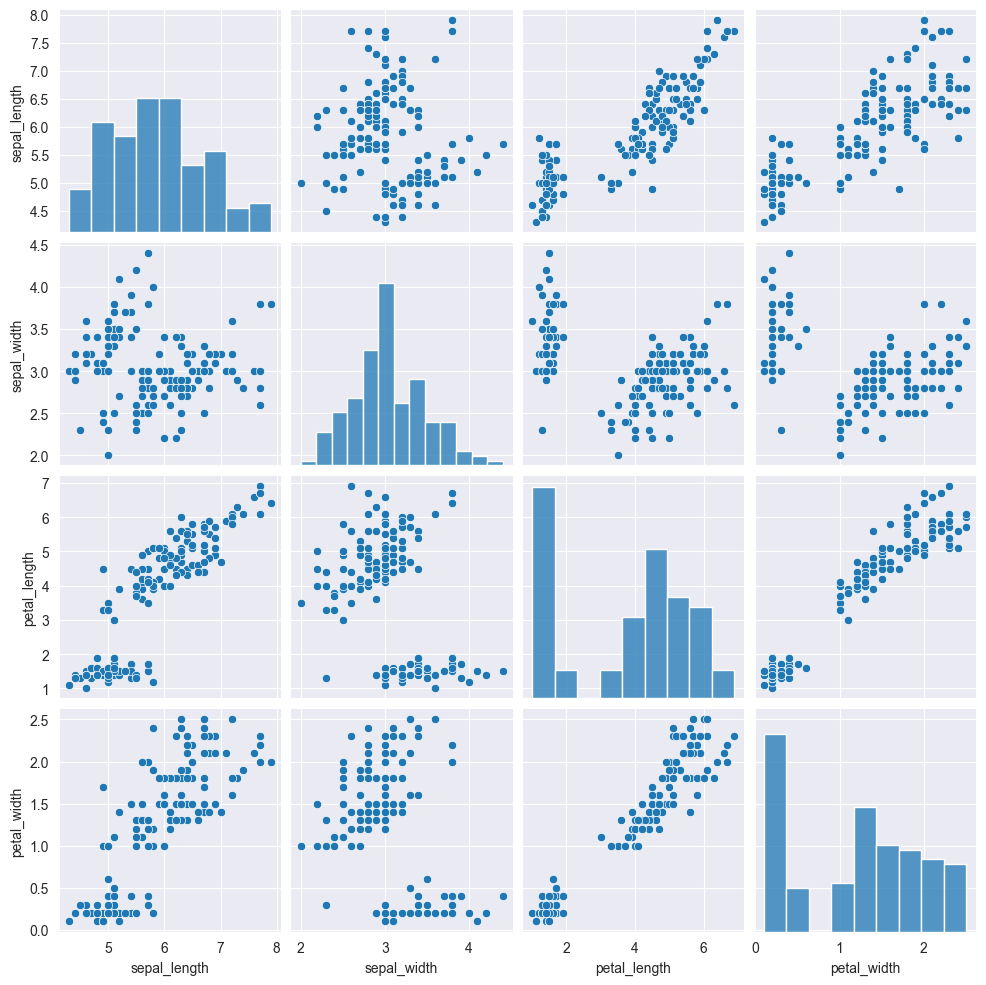

In [16]:
sns.pairplot(data=data)
plt.show()

In [17]:
from sklearn.cluster import KMeans

In [18]:
wcss = []

for i in range(2, 20):
    km = KMeans(n_clusters=i, init='k-means++')
    km.fit(data)
    wcss.append(km.inertia_)

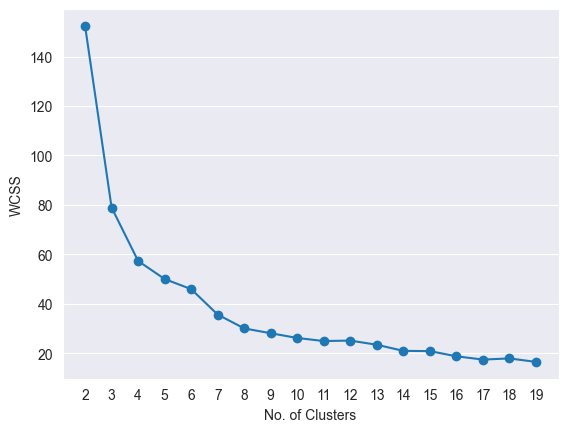

In [19]:
plt.plot([i for i in range(2, 20)], wcss, marker='o')
plt.xlabel('No. of Clusters')
plt.xticks([i for i in range(2, 20)])
plt.ylabel('WCSS')
plt.grid(axis='x')
plt.show()

In [20]:
kmn = KMeans(n_clusters=3)
data['predict'] = kmn.fit_predict(data)

In [21]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,predict
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [22]:
from sklearn.metrics import silhouette_score

In [26]:
silhouette_score(X=data, labels=kmn.labels_)

np.float64(0.6844657470953514)

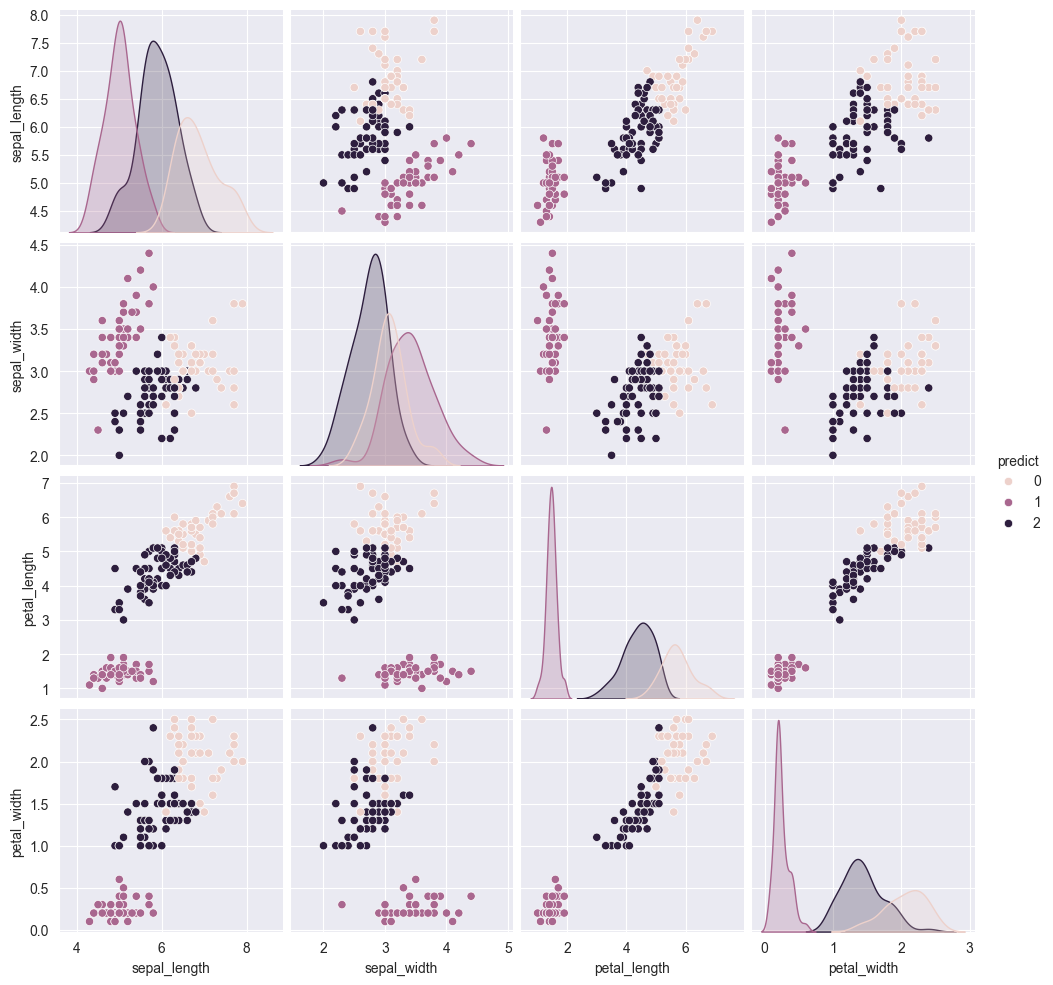

In [9]:
sns.pairplot(data=data, hue='predict')
plt.show()

In [10]:
org_data = pd.read_csv('../Datasets/iris.csv')

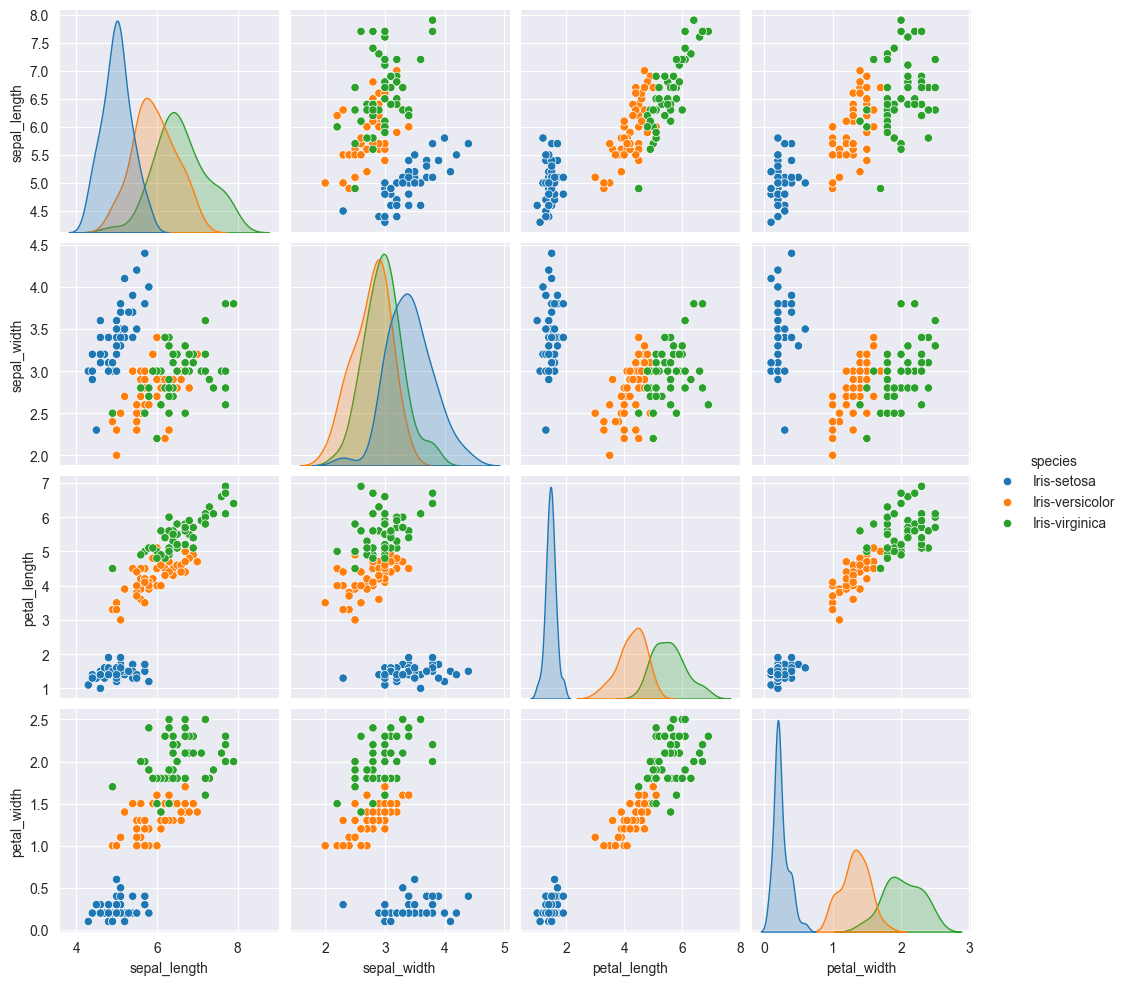

In [11]:
sns.pairplot(data=org_data, hue='species')
plt.show()

In [28]:
ss = []
no_c = [j for j in range(2, 20)]

for i in range(2, 20):
    km1 = KMeans(n_clusters=i, init='k-means++')
    km1.fit(data)
    ss.append(silhouette_score(X=data, labels=km1.labels_))

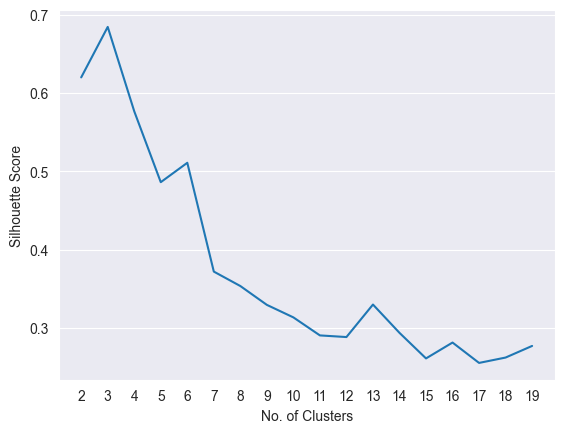

In [32]:
plt.plot(no_c, ss)
plt.xlabel('No. of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(no_c)
plt.grid(axis='x')
plt.show()